# ✅ 1. Prepare the Drawing Environment

The necessary libraries are imported to create and manipulate images (`PIL`) and to visualize graphics (`matplotlib`). A 200x200 pixel canvas with a white background is defined, and individual pixel access is enabled using the `load` function, which allows drawing by modifying the color of each point.


In [ ]:
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

width, height = 200, 200
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

# ✅ 2. Draw a Line Using Bresenham's Algorithm

Bresenham's algorithm is implemented to draw a straight line between two specified points. This algorithm determines which pixels to activate using only integer operations, making it highly efficient. Each time a new point on the line is drawn, it is painted in red, following an incremental process that adjusts the coordinates based on the approximation error.

In [ ]:
def bresenham(x0, y0, x1, y1):
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        pixels[x0, y0] = (255, 0, 0)
        if x0 == x1 and y0 == y1:
            break
        e2 = 2 * err
        if e2 > -dy:
            err -= dy
            x0 += sx
        if e2 < dx:
            err += dx
            y0 += sy

Bresenham's algorithm is used to draw a straight line between two points on a pixel grid using only integer operations. Given a starting point $(x_0, y_0)$ and an ending point $(x_1, y_1)$, the absolute differences in coordinates are calculated as $dx = |x_1 - x_0|$ and $dy = |y_1 - y_0|$.

An initial error variable is set as $err = dx - dy$, along with two increment directions $sx$ and $sy$, which determine whether each coordinate should increase or decrease at each step. In each iteration, the current pixel is painted, and the error is updated by multiplying it by two $(e2 = 2 \times err)$.

If $e2 > -dy$, the error is reduced by $dy$ and $x$ is incremented in the direction of $sx$. If $e2 < dx$, the error is increased by $dx$ and $y$ is updated in the direction of $sy$. The process continues until the endpoint is reached, producing a continuous line that closely follows the ideal path without using floating-point calculations.

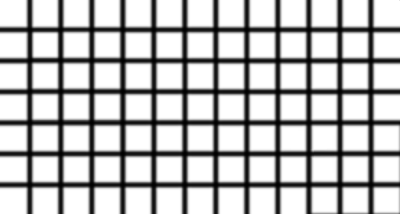

In [ ]:
bresenham(20,20, 180, 120)

# ✅ 3. Draw a Circle Using the Midpoint Algorithm

The midpoint algorithm is implemented to draw a circle around a given center with a specified radius. The circle is generated by taking advantage of its symmetry, drawing eight mirrored points simultaneously in different quadrants. The pixels are painted in blue, and a decision variable is updated to calculate the circle's path efficiently without requiring expensive computations.

In [13]:
def midpoint_circle(x0, y0, radius):
    x = radius
    y = 0
    p = 1 - radius

    while x >= y:
        for dx, dy in [(x, y), (y, x), (-x, y), (-y, x), (-x, -y), (-y, -x), (x, -y), (y, -x)]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixels[x0 + dx, y0 + dy] = (0, 0, 255)
        y += 1
        if p <= 0:
            p = p + 2*y + 1
        else:
            x -= 1
            p = p + 2*y - 2*x + 1

To test the circle drawing algorithm, we will use the function `midpoint_circle(100, 100, 40)`. This instruction will draw a circle centered at point $(100, 100)$ with a radius of $40$ pixels. The algorithm will compute the contour points of the circle using symmetry and decisions based on an error variable, ensuring that the resulting shape is as accurate as possible on the pixel grid. Each point of the circle will be painted in blue, making the result clearly visible when the image is displayed.


In [14]:
midpoint_circle(100, 100, 40)

# ✅ 4. Fill a Triangle (Simple Scanline Rasterization)

A simple rasterization technique is developed to fill a triangle using horizontal lines (scanlines). First, the triangle's vertices are sorted by their vertical coordinate. Then, the triangle's edges are interpolated to determine the left and right endpoints for each row. Finally, all the pixels between those endpoints are filled with green color.



In [18]:
def fill_triangle(p1, p2, p3):
    # ordenar por y
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    def interpolate(y0, y1, x0, x1):
        if y1 - y0 == 0: return []
        return [int(x0 + (x1 - x0) * (y - y0) / (y1 - y0)) for y in range(y0, y1)]

    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x12 + x23
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = (0, 255, 0)

To test the triangle filling algorithm, we will use the function `fill_triangle((30, 50), (100, 150), (160, 60))`. This call defines a triangle with vertices at coordinates $(30, 50)$, $(100, 150)$, and $(160, 60)$. The algorithm will sort the points by their vertical component, interpolate the edges to determine the left and right endpoints on each horizontal row, and then fill the interior of the triangle by coloring it green. This will allow a solid triangle to be visualized on the canvas when the image is displayed.



In [19]:
fill_triangle((30, 50), (100, 150), (160, 60))

# ✅ 5. Show the Result

The `matplotlib` library is used to display the final image generated on the canvas. The plot axes are disabled so that only the resulting drawing is visible, allowing a clear view of the created shapes.


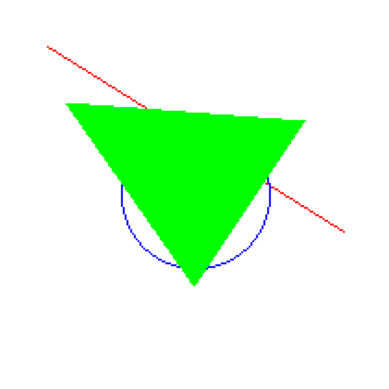

In [20]:
plt.imshow(image)
plt.axis('off')  # Quita los ejes para que se vea solo la imagen
plt.show()